In [1]:
import pandas as pd
import plotly.graph_objects as go
from helpers import textFormatter, Bubbles
import datetime
import numpy as np

## 1. File processing
Объеденим сначала файлы по медиаагенствам, добавим к ним необходимые параметры, а затем объеденим в один датафрем

In [2]:
# Tass
tass_2023 = pd.read_csv("Data/tass_data.csv")
tass_2022 = pd.read_csv("Data/tass_data_2022.csv")
tass_2021 = pd.read_csv("Data/tass_data_2021.csv")
tass_2020_1 = pd.read_csv("Data/tass_data_2020_1.csv")
tass_2020_2 = pd.read_csv("Data/tass_data_2020_2.csv")
tass_2020_3 = pd.read_csv("Data/tass_data_2020_3.csv")
# Ria novosti
ria_2023 = pd.read_csv("Data/ria_data.csv")
ria_2022 = pd.read_csv("Data/ria_data_2022.csv")
ria_2021 = pd.read_csv("Data/ria_data_2021.csv")
ria_2020_1 = pd.read_csv("Data/ria_data_2020_1.csv")
ria_2020_2 = pd.read_csv("Data/ria_data_2020_2.csv")
ria_2020_3 = pd.read_csv("Data/ria_data_2020_3.csv")

In [3]:
# Tass union
tass_list = [tass_2023, tass_2022, tass_2021, tass_2020_1, tass_2020_2, tass_2020_3]
tass_df = pd.concat(tass_list)

In [4]:
# Converting series from object to datetime "%Y-%m-%d %H:%M:%S.%f"
tass_df.date = pd.to_datetime(tass_df.date, format="%Y-%m-%d %H:%M:%S.%f")

In [5]:
# Adding new column
tass_df['agency'] = "tass"

In [6]:
# Drop duplicates
tass_df = tass_df.drop_duplicates()

In [7]:
tass_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21914 entries, 0 to 1290
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      21914 non-null  int64         
 1   date    21914 non-null  datetime64[ns]
 2   path    21914 non-null  object        
 3   type    21914 non-null  object        
 4   text    21914 non-null  object        
 5   agency  21914 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
# Ria union
ria_list = [ria_2023, ria_2022, ria_2021, ria_2020_1, ria_2020_2, ria_2020_3]
ria_df = pd.concat(ria_list)

In [9]:
# Converting series from object to datetime "%d-%m-%Y %H:%M"
ria_df.date = pd.to_datetime(ria_df.date, format="%d-%m-%Y %H:%M")

In [10]:
# Adding new column
ria_df['agency'] = "ria"

In [11]:
# Drop duplicates
ria_df = ria_df.drop_duplicates()

In [12]:
ria_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10181 entries, 0 to 868
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      10181 non-null  int64         
 1   date    10181 non-null  datetime64[ns]
 2   url     10181 non-null  object        
 3   text    10181 non-null  object        
 4   agency  10181 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 477.2+ KB


In [13]:
# Main dataframe with all data
main_df = pd.concat(objs=[tass_df.drop(columns=["type", "path"]), ria_df.drop(columns=["url"])], ignore_index=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32095 entries, 0 to 32094
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      32095 non-null  int64         
 1   date    32095 non-null  datetime64[ns]
 2   text    32095 non-null  object        
 3   agency  32095 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1003.1+ KB


In [14]:
# Из логов достаем общее количество статей и формируем таблицу

df = pd.read_csv("Data/counter.csv")
df = df.groupby(["year", "agency"]).sum().reset_index()
df.pivot_table(index='year', columns='agency', values='values', 
               margins=True, margins_name='Total').astype(int)

agency,ria,tass,Total
year,,,
2020,181215,226808,204011
2021,141503,280350,210926
2022,159231,286213,222722
2023,161677,283270,222473
Total,160906,269160,215033


In [15]:
# Все статьи по годам
year_totals = df.groupby('year')['values'].sum().reset_index()
year_totals

,year,values
0,2020,408023
1,2021,421853
2,2022,445444
3,2023,444947


In [16]:
# Экологические статьи по годам
eco_year = main_df.groupby(main_df.date.dt.year,).size().reset_index()
eco_year.columns = ["year", "values"]
eco_year

,year,values
0,2020,8138
1,2021,8838
2,2022,7798
3,2023,7321


In [17]:
print(f"Всего статей {year_totals['values'].sum()}, из них {eco_year['values'].sum()} экологических статей. \nЗа 2020-2021 года было {eco_year[:2]['values'].sum()} экологических статей, за 2022-2023 года {eco_year[2:]['values'].sum()}")

Всего статей 1720267, из них 32095 экологических статей. 
За 2020-2021 года было 16976 экологических статей, за 2022-2023 года 15119


---

## 2. Plots preview

In [18]:
# Calculate the total sum of eco_year values
total_eco_year = eco_year['values'].sum()

# Calculate the total sum of year_totals values
total_year_totals = year_totals['values'].sum()

# Calculate the percentage of total eco_year in total year_totals
percentage_eco_in_year_totals = (total_eco_year / total_year_totals) * 100

# Create a Pie chart
fig = go.Figure(data=[go.Pie(labels=['Экологические статьи', 'Все статьи за 2020-2023 гг.'], 
                             values=[percentage_eco_in_year_totals, 100 - percentage_eco_in_year_totals])])

# Update layout
fig.update_layout(title="Соотношение экологических статей ко всем статьям за 2020-2023 гг.",
                  height=500, width=850)

# Show the figure
fig.show()


In [19]:
# Amount of articles by date
fig = go.Figure()
fig.add_trace(go.Histogram(x=ria_df.date, name="Ria novosti"))
fig.add_trace(go.Histogram(x=tass_df.date, name="Tass"))
fig.update_layout(height=400, width=1350)
fig.show()


In [20]:
tass_df["normal_dates"] = tass_df.date.dt.normalize()
ria_df["normal_dates"] = ria_df.date.dt.normalize()

In [21]:
# Filtered dates
ria_dates_filtered = ria_df.normal_dates
tass_dates_filtered = tass_df.normal_dates

# Compute the sum of articles for each month
ria_articles_by_month = ria_dates_filtered.groupby(ria_dates_filtered.dt.to_period('M')).size()
tass_articles_by_month = tass_dates_filtered.groupby(tass_dates_filtered.dt.to_period('M')).size()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=ria_articles_by_month.index.to_timestamp(), y=ria_articles_by_month.values, mode='lines', name="Ria novosti"))
fig.add_trace(go.Scatter(x=tass_articles_by_month.index.to_timestamp(), y=tass_articles_by_month.values, mode='lines', name="Tass"))

# Update layout
fig.update_layout(title="Количество экологических статей с 2020 по 2023 гг. по месяцам",
                  xaxis_title="Дата",
                  yaxis_title="Количество статей",
                  legend_title="Источник",
                  height=500, width=850,
                  showlegend=True)

fig.show()



In [22]:
x = np.array(object=eco_year['year'])
y = np.array(object=eco_year['values'])
m, b = np.polyfit(x, y, 1)


fig = go.Figure(data=[go.Bar(x=eco_year['year'], y=eco_year['values'], name='Values'),
                      go.Scatter(x=eco_year['year'], y=m*x + b, mode='lines', name='Trend')])


# Update layout
fig.update_layout(title="Количество экологических статей за 2020-2023 гг.",
                  xaxis_title="Year",
                  yaxis_title="Values",
                  height=500, width=700)

# Show the figure
fig.show()

In [23]:
# Filtered dates
ria_dates_filtered = ria_df[ria_df.normal_dates <= datetime.datetime(2021, 12, 31)].normal_dates
tass_dates_filtered = tass_df[tass_df.normal_dates <= datetime.datetime(2021, 12, 31)].normal_dates

# Compute the sum of articles for each month
ria_articles_by_month = ria_dates_filtered.groupby(ria_dates_filtered.dt.to_period('M')).size()
tass_articles_by_month = tass_dates_filtered.groupby(tass_dates_filtered.dt.to_period('M')).size()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=ria_articles_by_month.index.to_timestamp(), y=ria_articles_by_month.values, mode='lines', name="Ria novosti"))
fig.add_trace(go.Scatter(x=tass_articles_by_month.index.to_timestamp(), y=tass_articles_by_month.values, mode='lines', name="Tass"))

# Update layout
fig.update_layout(title="Количество экологических статей с 2020 по 2021 гг. по месяцам",
                  xaxis_title="Дата",
                  yaxis_title="Количество статей",
                  legend_title="Источник",
                  height=500, width=850,
                  showlegend=True)

fig.show()



In [24]:
# Filtered dates
ria_dates_filtered = ria_df[ria_df.normal_dates > datetime.datetime(2021, 12, 31)].normal_dates
tass_dates_filtered = tass_df[tass_df.normal_dates > datetime.datetime(2021, 12, 31)].normal_dates

# Compute the sum of articles for each month
ria_articles_by_month = ria_dates_filtered.groupby(ria_dates_filtered.dt.to_period('M')).size()
tass_articles_by_month = tass_dates_filtered.groupby(tass_dates_filtered.dt.to_period('M')).size()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=ria_articles_by_month.index.to_timestamp(), y=ria_articles_by_month.values, mode='lines', name="Ria novosti"))
fig.add_trace(go.Scatter(x=tass_articles_by_month.index.to_timestamp(), y=tass_articles_by_month.values, mode='lines', name="Tass"))

# Update layout
fig.update_layout(title="Количество экологических статей с 2022 по 2023 гг. по месяцам",
                  xaxis_title="Дата",
                  yaxis_title="Количество статей",
                  legend_title="Источник",
                  height=500, width=850,
                  showlegend=True)

fig.show()



In [25]:
# Amount of articles' types
fig = go.Figure()
fig.add_trace(go.Histogram(x=tass_df.type, name="Tass type"))
fig.show()

In [26]:
articles_count = main_df.agency.value_counts()
percentage = articles_count / articles_count.sum() * 100

fig = go.Figure(data=[go.Pie(labels=percentage.index, values=percentage.values)])
fig.update_layout(title='Percentage of Articles by News Agency')

fig.show()

---

## 3. Text processing

In [27]:
main_df.text

0        брюссель, 1 января. /тасс/. "защитить. укрепит...
1        москва, 30 декабря. /тасс/. упрощенное получен...
2        санкт-петербург, 30 декабря. /тасс/. ленинград...
3        бишкек, 30 декабря. /тасс/. снежный барс офици...
4        улан-удэ, 30 декабря. /тасс/. байкальский запо...
                               ...                        
32090    москва, 2 янв — риа новости, антон лисицын. в ...
32091    на фотоконкурс русского географического общест...
32092    москва, 1 янв - риа новости. новогоднее настро...
32093    ростов-на-дону, 1 янв – риа новости, юлия насу...
32094    владивосток, 1 янв - риа новости. генконсул ин...
Name: text, Length: 32095, dtype: object

In [28]:
cleaner = textFormatter()

main_df["clean_text"] = main_df.text.apply(func=cleaner.regex_remove_start)
main_df.clean_text

0         защитить укрепить подготовиться  с таким лозу...
1         упрощенное получение ночных пропусков для гру...
2         ленинградский зоопарк в санктпетербурге плани...
3         снежный барс официально признан национальным ...
4         байкальский заповедник принял в  году более  ...
                               ...                        
32090    москва  янв — риа новости антон лисицын в кану...
32091    на фотоконкурс русского географического общест...
32092     новогоднее настроение захватило уже все росси...
32093    ростовнадону  янв – риа новости юлия насулина ...
32094     генконсул индии во владивостоке шубхам кумар ...
Name: clean_text, Length: 32095, dtype: object

In [29]:
stemmed_keywords = cleaner.stem_keywords()
stemmed_keywords

{'Водные ресурсы': ['вод',
  'водн ресурс',
  'поверхностн вод',
  'чист вод',
  'водн кризис',
  'питьев вод',
  'средн уровен вод',
  'качествен питьев вод',
  'мор',
  'океа',
  'рек',
  'загрязнен вод',
  'загрязнен мор',
  'загрязнен океан',
  'загрязнен рек',
  'загрязнен биоразнообраз',
  'загрязнен питьев вод',
  'загрязнен водн объект',
  'паводок',
  'закислен вод',
  'биоразнообраз морск зон',
  'биоразнообраз прибрежн зон',
  'питьев водоснабжен',
  'сброс загрязнен сточн вод',
  'загрязнен сток',
  'сброс сточн вод',
  'техноген катастроф',
  'таян льда',
  'таян льдов',
  'ледник',
  'наводнен',
  'повышен уровн мор',
  'международн вод',
  'воен конфликт',
  'морск млекопита',
  'морск экосистем',
  'рыболовств',
  'пресн вод',
  'артезианск вод',
  'водоохра зон',
  'обеспечен вод',
  'океанограф',
  'прибрежн вод',
  'планетарн потеплен',
  'подь уровн мор',
  'водохранилищ',
  'водоохра мероприят',
  'экологическ стандарт',
  'водн экосистем',
  'пресноводн озер',
  '

In [31]:
main_df["category"] = main_df.clean_text.apply(lambda x: cleaner.get_article_text(x, stemmed_keywords))
main_df.head(10)

,id,date,text,agency,clean_text,category
0,19658485,2023-12-31 21:04:00.649294,"брюссель, 1 января. /тасс/. ""защитить. укрепит...",tass,защитить укрепить подготовиться с таким лозу...,Изменение климата
1,19658081,2023-12-30 17:28:37.945804,"москва, 30 декабря. /тасс/. упрощенное получен...",tass,упрощенное получение ночных пропусков для гру...,No category
2,19655553,2023-12-30 08:03:57.112826,"санкт-петербург, 30 декабря. /тасс/. ленинград...",tass,ленинградский зоопарк в санктпетербурге плани...,No category
3,19655421,2023-12-30 07:07:58.121252,"бишкек, 30 декабря. /тасс/. снежный барс офици...",tass,снежный барс официально признан национальным ...,No category
4,19655123,2023-12-30 02:41:21.919705,"улан-удэ, 30 декабря. /тасс/. байкальский запо...",tass,байкальский заповедник принял в году более ...,Изменение климата
5,19655015,2023-12-30 00:21:46.591290,"москва, 30 декабря. /тасс/. составление списка...",tass,составление списка факторов провоцирующих пер...,Изменение климата
6,19654081,2023-12-29 18:09:37.847345,"великий новгород, 29 декабря. /тасс/. власти н...",tass,власти новгородской области планируют что тур...,Водные ресурсы
7,19652403,2023-12-29 12:04:48.090423,"москва, 29 декабря. /тасс/. лесовосстановитель...",tass,лесовосстановительные акции которые прошли в ...,Экосистемы суши
8,19652313,2023-12-29 11:51:09.788906,"москва, 29 декабря. /тасс/. контроль за уличны...",tass,контроль за уличными фотографами с дикими зве...,Экосистемы суши
9,19652175,2023-12-29 11:26:32.841201,"москва, 29 декабря. /тасс/. москва сохранила з...",tass,москва сохранила за собой лидерство в экологи...,Изменение климата


In [32]:
categories_count = main_df.category.value_counts()

percentage = categories_count / categories_count.sum() * 100

fig = go.Figure(data=[go.Pie(labels=percentage.index, values=percentage.values)])
fig.update_layout(title='Категории текстов')

fig.show()

---

## 4. Bubbles of words

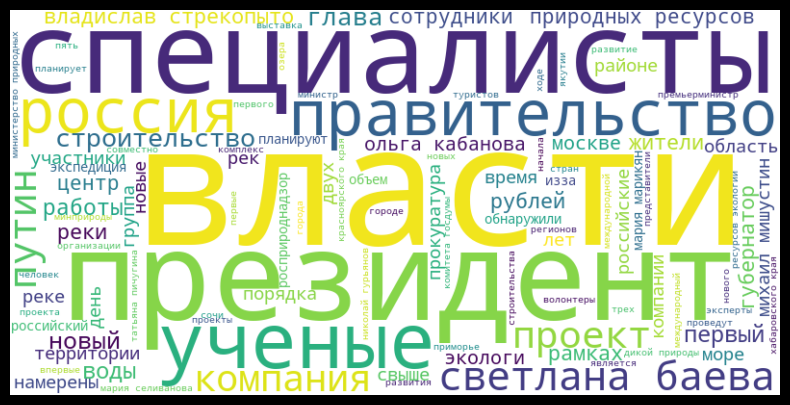

In [ ]:
bubble = Bubbles()

bubble.create_bubble(articles= main_df[main_df.category == "Водные ресурсы"].clean_text)

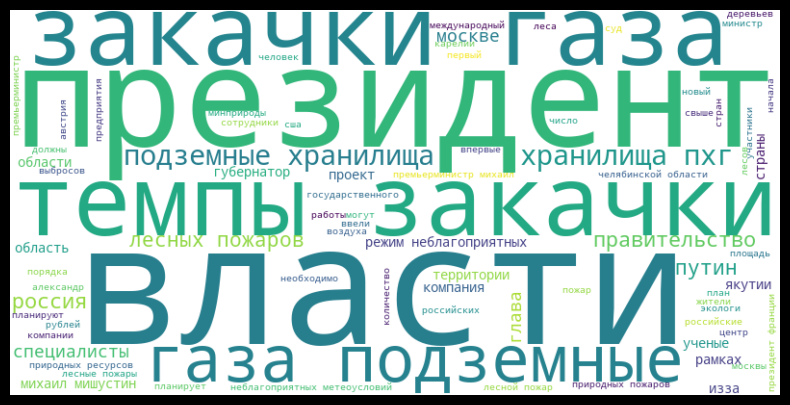

In [ ]:
bubble.create_bubble(articles= main_df[main_df.category == "Изменение климата"].clean_text)

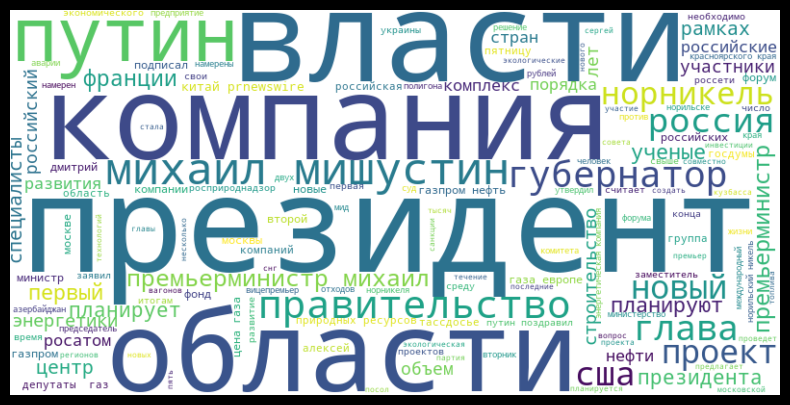

In [ ]:
bubble.create_bubble(articles= main_df[main_df.category == "Энергетика"].clean_text)

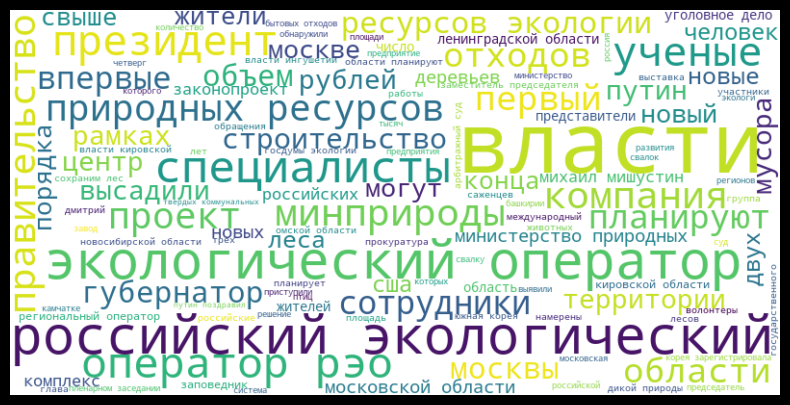

In [ ]:
bubble.create_bubble(articles= main_df[main_df.category == "Экосистемы суши"].clean_text)

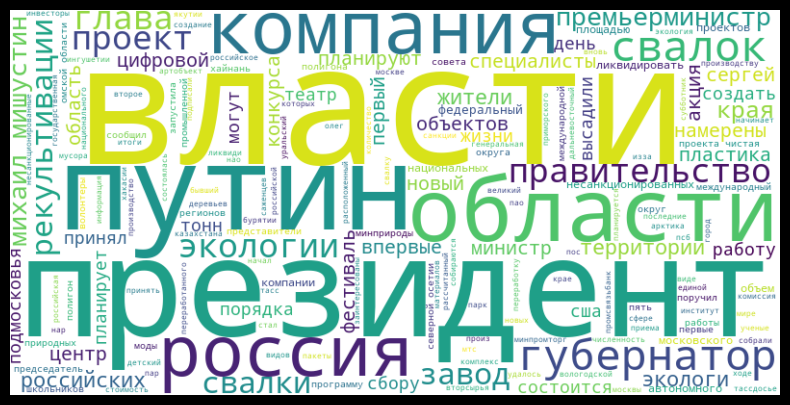

In [ ]:
bubble.create_bubble(articles= main_df[main_df.category == "Ответственное потребление"].clean_text)

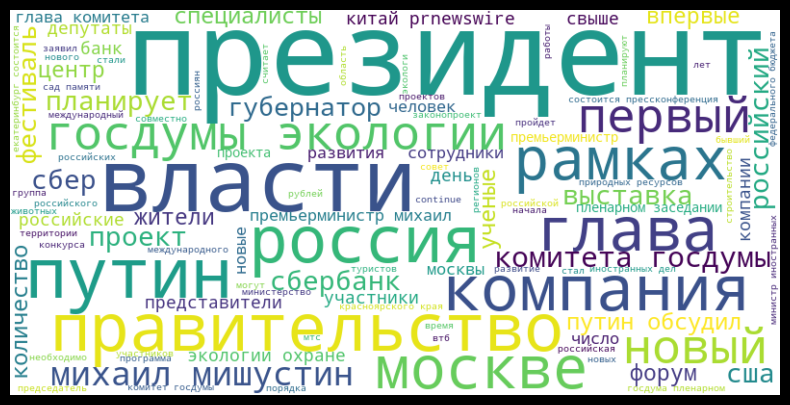

In [ ]:
bubble.create_bubble(articles= main_df[main_df.category == "No category"].clean_text)

In [33]:
# численность статей по каждому из фрейму
main_df.groupby(main_df.category).size().reset_index()

,category,0
0,No category,12279
1,Водные ресурсы,8411
2,Изменение климата,4498
3,Ответственное потребление,467
4,Экосистемы суши,4465
5,Энергетика,1975


In [34]:
main_df[main_df.category == "Ответственное потребление"][:40].to_excel("Data/text.xlsx")

In [35]:
main_df[main_df.category == "Энергетика"][:40].to_excel("Data/text.xlsx")